In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class Quantizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return (X * 10).astype(int)

In [7]:
%load_ext google.cloud.bigquery

In [8]:
%%bigquery df_perfil_empresas

SELECT 
    tb1.idEmpresa, tb1.dtCompetencia, COUNT(DISTINCT idPessoa) AS qtd_vidas,
    
    SUM(AltoCusto_Flag) / COUNT(DISTINCT IdPessoa)                              AS perc_alto_custo,
    SUM(Cronico_Flag) / COUNT(DISTINCT IdPessoa)                                AS perc_cronicos,
    SUM(ContumazConsultaEletiva) / COUNT(DISTINCT IdPessoa)                     AS perc_contumazes_consultas_eletivas,
    SUM(ContumazConsultaPS) / COUNT(DISTINCT IdPessoa)                          AS perc_contumazes_ps,
    SUM(ContumazExames) / COUNT(DISTINCT IdPessoa)                              AS perc_contumazes_exames,
    SUM(AltoCusto_Gestante) / COUNT(DISTINCT IdPessoa)                          AS perc_gestantes,
    SUM(IF(Cronico_Flag + AltoCusto_Flag > 0, 1, 0)) / COUNT(DISTINCT IdPessoa) AS perc_cronicos_alto_custo,
    SUM(NaoUtilizadoresFaixaEtaria40a69) / COUNT(DISTINCT IdPessoa)             AS perc_NaoUtilizadoresFaixaEtaria40a69,
    SUM(NaoUtilizadoresFaixaEtaria21a65) / COUNT(DISTINCT IdPessoa)             AS perc_NaoUtilizadoresFaixaEtaria21a65,
    SUM(NaoUtilizadoresfaixaEtaria50a75) / COUNT(DISTINCT IdPessoa)             AS perc_NaoUtilizadoresfaixaEtaria50a75,
    SUM(NaoUtilizadoresFaixaEtariaMenor2) / COUNT(DISTINCT IdPessoa)            AS perc_NaoUtilizadoresFaixaEtariaMenor2,
    SUM(NaoUtilizadoresFaixaEtariaMaior45) / COUNT(DISTINCT IdPessoa)           AS perc_NaoUtilizadoresFaixaEtariaMaior45,
    SUM(NaoUtilizadoresNUMamografia) / COUNT(DISTINCT IdPessoa)                 AS perc_NaoUtilizadoresNUMamografia,
    SUM(NaoUtilizadoresNUPapanicolau) / COUNT(DISTINCT IdPessoa)                AS perc_NaoUtilizadoresNUPapanicolau,
    SUM(NaoUtilizadoresNUSangueOculto) / COUNT(DISTINCT IdPessoa)               AS perc_NaoUtilizadoresNUSangueOculto,
    SUM(NaoUtilizadoresNULactentes) / COUNT(DISTINCT IdPessoa)                  AS perc_NaoUtilizadoresNULactentes,
    SUM(NaoUtilizadoresNUCheckUp) / COUNT(DISTINCT IdPessoa)                    AS perc_NaoUtilizadoresNUCheckUp,
    1                                                                           AS flag_indicador_empresa
    
FROM
    cosmic-shift-235317.fenix_bi.view_fato_classificacao_vidas AS tb1

INNER JOIN (
    SELECT 
        idEmpresa, MAX(dtCompetencia) AS dtCompetencia
    FROM
        cosmic-shift-235317.fenix_bi.view_fato_classificacao_vidas
    GROUP BY idEmpresa
) AS tb2 
    ON tb1.idEmpresa = tb2.idEmpresa AND tb1.dtCompetencia = tb2.dtCompetencia

GROUP BY tb1.idEmpresa, tb1.dtCompetencia
ORDER BY tb1.idEmpresa, tb1.dtCompetencia

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [00:03<00:00, 14.26rows/s]


In [9]:
df_perfil_empresas.head()

idEmpresa dtCompetencia  qtd_vidas  perc_alto_custo  perc_cronicos  \
0          1    2021-05-01       5845         0.000000       0.000000   
1        159    2021-04-01      30447         0.006963       0.141820   
2        161    2021-05-01      85715         0.002345       0.145494   
3        163    2021-04-01      21216         0.004101       0.141780   
4        168    2021-05-01       3996         0.013764       0.311812   

   perc_contumazes_consultas_eletivas  perc_contumazes_ps  \
0                            0.000000            0.000000   
1                            0.024994            0.010674   
2                            0.009648            0.001318   
3                            0.029695            0.023614   
4                            0.033784            0.019520   

   perc_contumazes_exames  perc_gestantes  perc_cronicos_alto_custo  ...  \
0                0.000000        0.000171                  0.000000  ...   
1                0.023582        0.013006                  0.144481  ...   
2                0.006650        0.001377                  0.145587  ...   
3                0.034219        0.010134                  0.142345  ...   
4                0.027528        0.008008                  0.314314  ...   

   perc_NaoUtilizadoresFaixaEtaria21a65  perc_NaoUtilizadoresfaixaEtaria50a75  \
0                              0.679042                              0.126946   
1                              0.662331                              0.064637   
2                              0.589348                              0.312956   
3                              0.630939                              0.058729   
4                              0.556306                              0.247497   

   perc_NaoUtilizadoresFaixaEtariaMenor2  \
0                               0.030282   
1                               0.032121   
2                               0.013428   
3                               0.031674   
4                               0.022523   

   perc_NaoUtilizadoresFaixaEtariaMaior45  perc_NaoUtilizadoresNUMamografia  \
0                                0.211634                          0.137382   
1                                0.119322                          0.123460   
2                                0.490019                          0.198717   
3                                0.120522                          0.104072   
4                                0.377377                          0.102853   

   perc_NaoUtilizadoresNUPapanicolau  perc_NaoUtilizadoresNUSangueOculto  \
0                           0.335329                            0.126946   
1                           0.341544                            0.061221   
2                           0.293356                            0.300449   
3                           0.340686                            0.056655   
4                           0.185686                            0.214715   

   perc_NaoUtilizadoresNULactentes  perc_NaoUtilizadoresNUCheckUp  \
0                         0.030111                       0.211634   
1                         0.012448                       0.047460   
2                         0.010932                       0.396057   
3                         0.009663                       0.041242   
4                         0.006006                       0.082082   

   flag_indicador_empresa  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 21 columns]

In [10]:
X = df_perfil_empresas \
    .drop(columns=['idEmpresa', 'dtCompetencia', 'flag_indicador_empresa']) \
    .fillna(0)

X.head()

qtd_vidas  perc_alto_custo  perc_cronicos  \
0       5845         0.000000       0.000000   
1      30447         0.006963       0.141820   
2      85715         0.002345       0.145494   
3      21216         0.004101       0.141780   
4       3996         0.013764       0.311812   

   perc_contumazes_consultas_eletivas  perc_contumazes_ps  \
0                            0.000000            0.000000   
1                            0.024994            0.010674   
2                            0.009648            0.001318   
3                            0.029695            0.023614   
4                            0.033784            0.019520   

   perc_contumazes_exames  perc_gestantes  perc_cronicos_alto_custo  \
0                0.000000        0.000171                  0.000000   
1                0.023582        0.013006                  0.144481   
2                0.006650        0.001377                  0.145587   
3                0.034219        0.010134                  0.142345   
4                0.027528        0.008008                  0.314314   

   perc_NaoUtilizadoresFaixaEtaria40a69  perc_NaoUtilizadoresFaixaEtaria21a65  \
0                              0.298717                              0.679042   
1                              0.202516                              0.662331   
2                              0.387202                              0.589348   
3                              0.220258                              0.630939   
4                              0.300050                              0.556306   

   perc_NaoUtilizadoresfaixaEtaria50a75  \
0                              0.126946   
1                              0.064637   
2                              0.312956   
3                              0.058729   
4                              0.247497   

   perc_NaoUtilizadoresFaixaEtariaMenor2  \
0                               0.030282   
1                               0.032121   
2                               0.013428   
3                               0.031674   
4                               0.022523   

   perc_NaoUtilizadoresFaixaEtariaMaior45  perc_NaoUtilizadoresNUMamografia  \
0                                0.211634                          0.137382   
1                                0.119322                          0.123460   
2                                0.490019                          0.198717   
3                                0.120522                          0.104072   
4                                0.377377                          0.102853   

   perc_NaoUtilizadoresNUPapanicolau  perc_NaoUtilizadoresNUSangueOculto  \
0                           0.335329                            0.126946   
1                           0.341544                            0.061221   
2                           0.293356                            0.300449   
3                           0.340686                            0.056655   
4                           0.185686                            0.214715   

   perc_NaoUtilizadoresNULactentes  perc_NaoUtilizadoresNUCheckUp  
0                         0.030111                       0.211634  
1                         0.012448                       0.047460  
2                         0.010932                       0.396057  
3                         0.009663                       0.041242  
4                         0.006006                       0.082082

In [11]:
preprocessing_pipe = Pipeline([
    ("feature_engineering", PolynomialFeatures(degree=50, include_bias=False, interaction_only=True)),
    ("scale_0_1", MinMaxScaler()),
    ("discretize", Quantizer()),
    ("pca", PCA(n_components=3, random_state=42))
])

clustering_pipe = Pipeline([
    ("cluster", KMeans(n_clusters=5, n_init=50, max_iter=500, random_state=42))
])

preprocessed_X = preprocessing_pipe.fit_transform(X)
clusters = clustering_pipe.fit_predict(preprocessed_X)
centroids = clustering_pipe._final_estimator.cluster_centers_

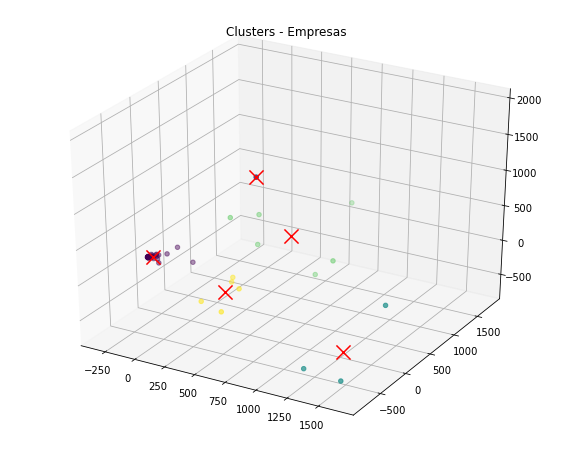

In [12]:
# Clusters 3D scatter plot.
fig, ax = plt.figure(figsize=(10, 8)), plt.axes(projection='3d')

x, y, z = preprocessed_X[:, 0], preprocessed_X[:, 1], preprocessed_X[:, 2]
ax.scatter3D(x, y, z, c=clusters);

x, y, z = centroids[:, 0], centroids[:, 1], centroids[:, 2]
ax.scatter3D(x, y, z, marker="x", s=200, c="red", depthshade=False);
plt.title('Clusters - Empresas');

In [16]:
output_df = df_perfil_empresas.copy()

output_df['cluster'] = clusters
output_df.head()

idEmpresa dtCompetencia  qtd_vidas  perc_alto_custo  perc_cronicos  \
0          1    2021-05-01       5845         0.000000       0.000000   
1        159    2021-04-01      30447         0.006963       0.141820   
2        161    2021-05-01      85715         0.002345       0.145494   
3        163    2021-04-01      21216         0.004101       0.141780   
4        168    2021-05-01       3996         0.013764       0.311812   

   perc_contumazes_consultas_eletivas  perc_contumazes_ps  \
0                            0.000000            0.000000   
1                            0.024994            0.010674   
2                            0.009648            0.001318   
3                            0.029695            0.023614   
4                            0.033784            0.019520   

   perc_contumazes_exames  perc_gestantes  perc_cronicos_alto_custo  ...  \
0                0.000000        0.000171                  0.000000  ...   
1                0.023582        0.013006                  0.144481  ...   
2                0.006650        0.001377                  0.145587  ...   
3                0.034219        0.010134                  0.142345  ...   
4                0.027528        0.008008                  0.314314  ...   

   perc_NaoUtilizadoresfaixaEtaria50a75  \
0                              0.126946   
1                              0.064637   
2                              0.312956   
3                              0.058729   
4                              0.247497   

   perc_NaoUtilizadoresFaixaEtariaMenor2  \
0                               0.030282   
1                               0.032121   
2                               0.013428   
3                               0.031674   
4                               0.022523   

   perc_NaoUtilizadoresFaixaEtariaMaior45  perc_NaoUtilizadoresNUMamografia  \
0                                0.211634                          0.137382   
1                                0.119322                          0.123460   
2                                0.490019                          0.198717   
3                                0.120522                          0.104072   
4                                0.377377                          0.102853   

   perc_NaoUtilizadoresNUPapanicolau  perc_NaoUtilizadoresNUSangueOculto  \
0                           0.335329                            0.126946   
1                           0.341544                            0.061221   
2                           0.293356                            0.300449   
3                           0.340686                            0.056655   
4                           0.185686                            0.214715   

   perc_NaoUtilizadoresNULactentes  perc_NaoUtilizadoresNUCheckUp  \
0                         0.030111                       0.211634   
1                         0.012448                       0.047460   
2                         0.010932                       0.396057   
3                         0.009663                       0.041242   
4                         0.006006                       0.082082   

   flag_indicador_empresa  cluster  
0                       1        0  
1                       1        4  
2                       1        1  
3                       1        4  
4                       1        2  

[5 rows x 22 columns]

In [17]:
output_df.groupby('cluster').mean()

idEmpresa     qtd_vidas  perc_alto_custo  perc_cronicos  \
cluster                                                             
0        258.972222   1142.916667         0.015106       0.122901   
1        161.000000  85715.000000         0.002345       0.145494   
2        223.666667   9029.000000         0.013771       0.280197   
3        273.666667    390.500000         0.024379       0.165931   
4        208.800000  11985.800000         0.009781       0.215441   

         perc_contumazes_consultas_eletivas  perc_contumazes_ps  \
cluster                                                           
0                                  0.027432            0.013360   
1                                  0.009648            0.001318   
2                                  0.036383            0.020953   
3                                  0.031454            0.027428   
4                                  0.031573            0.018192   

         perc_contumazes_exames  perc_gestantes  perc_cronicos_alto_custo  \
cluster                                                                     
0                      0.026144        0.011605                  0.127328   
1                      0.006650        0.001377                  0.145587   
2                      0.032678        0.012849                  0.283285   
3                      0.029778        0.019091                  0.170875   
4                      0.032172        0.012856                  0.217363   

         perc_NaoUtilizadoresFaixaEtaria40a69  \
cluster                                         
0                                    0.236243   
1                                    0.387202   
2                                    0.294689   
3                                    0.389310   
4                                    0.272566   

         perc_NaoUtilizadoresFaixaEtaria21a65  \
cluster                                         
0                                    0.772913   
1                                    0.589348   
2                                    0.643595   
3                                    0.761225   
4                                    0.665467   

         perc_NaoUtilizadoresfaixaEtaria50a75  \
cluster                                         
0                                    0.078925   
1                                    0.312956   
2                                    0.140346   
3                                    0.207832   
4                                    0.099207   

         perc_NaoUtilizadoresFaixaEtariaMenor2  \
cluster                                          
0                                     0.025584   
1                                     0.013428   
2                                     0.027871   
3                                     0.027768   
4                                     0.029402   

         perc_NaoUtilizadoresFaixaEtariaMaior45  \
cluster                                           
0                                      0.145571   
1                                      0.490019   
2                                      0.239086   
3                                      0.299421   
4                                      0.174936   

         perc_NaoUtilizadoresNUMamografia  perc_NaoUtilizadoresNUPapanicolau  \
cluster                                                                        
0                                0.078446                           0.306861   
1                                0.198717                           0.293356   
2                                0.096454                           0.223322   
3                                0.143532                           0.292659   
4                                0.114853                           0.293229   

         perc_NaoUtilizadoresNUSangueOculto  perc_NaoUtilizadoresNULactentes  \
cluster                                                                        
0                                  0.073717           